# ARIMA
I'm using the 2022 data for e-bikes as an example.

In [ ]:
#Install any packages you need
! pip install pmdarima
! pip install pandas
! pip install matplotlib
! pip install statsmodels
! pip install sklearn

Format and setup the data for easier manipulation

In [2]:
import pandas as pd

data = pd.read_csv("Data.csv")
#These are the values most likely to change
xField = "Year"
yField = "Europe"

data = data.dropna(subset=[yField])
for i in data.columns[1::]:
    data[i] = pd.to_numeric(data[i], errors="coerce")

data[xField] = pd.to_datetime(data[xField], format="%Y")
data[xField] = data[xField].dt.strftime("%Y")

data = data.dropna(subset=[yField])
data.head()

,Year,United States,Europe,France,China,India,Japan
0,2006,NaN,98.0,NaN,NaN,NaN,NaN
1,2007,NaN,173.0,NaN,NaN,NaN,NaN
2,2008,NaN,279.0,15.0,NaN,NaN,NaN
3,2009,NaN,422.0,24.0,NaN,NaN,NaN
4,2010,NaN,588.0,38.0,NaN,NaN,NaN


Plot the raw data just to see what it looks like

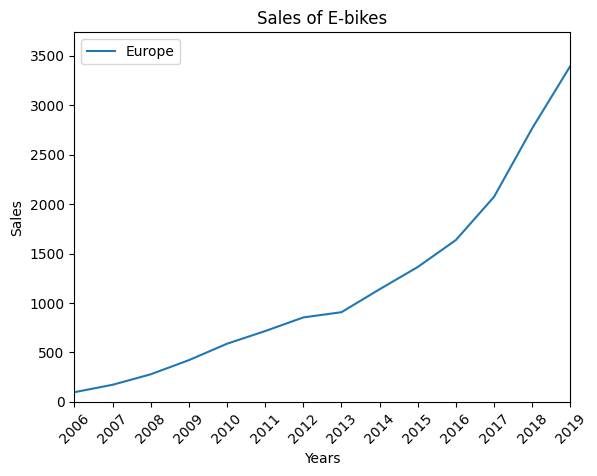

In [3]:
from matplotlib import pyplot as plt

def plotting(x, y):
    #These are the values most likely to change
    plt.title("Sales of E-bikes")
    plt.xlabel("Years")
    plt.ylabel("Sales")

    plt.xlim(x.iloc[0], x.iloc[-1])
    plt.ylim(0, max(y) * 1.1)
    plt.xticks(x[::1], rotation=45, fontsize=10)

    plt.legend(loc="upper left")

plt.plot(data[xField], data[yField], label=yField)
plotting(data[xField], data[yField])

Use this to calculate P value. If p value is < 0.05 then graph stationary otherwise it's not

In [4]:
from statsmodels.tsa.stattools import adfuller

test = adfuller(data[yField].dropna(), autolag="AIC")
print(f"ADF Statistic: {test[0]}")
print(f"p-value: {test[1]}")
print(f"n_lags: {test[2]}")
print(f"n_obs: {test[3]}")
print(f"Critical Values: {test[4]}")

ADF Statistic: 2.0652098439707847
p-value: 0.9987519193618251
n_lags: 5
n_obs: 8
Critical Values: {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}


Using ML to figure out the initial values, if we find a another way then this shouldn't be used

In [5]:
from pmdarima import auto_arima

ARIMAValues = auto_arima(data[yField].dropna(), trace=True, error_action="ignore", suppress_warnings=True)
ARIMAValues.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=178.473, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=165.873, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=171.931, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=189.053, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=167.237, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=167.420, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=165.232, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=166.940, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=166.987, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=179.597, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=168.763, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.808 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   14
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -80.616
Date:                Thu, 08 Feb 2024   AIC                            165.232
Time:                        23:10:35   BIC                            166.362
Sample:                             0   HQIC                           165.000
                                 - 14                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9695      0.077     12.549      0.000       0.818       1.121
sigma2      1.177e+04   4972.848      2.367      0.018    2023.257    2.15e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.96
Prob(Q):                              0.84   Prob(JB):                         0.38
Heteroskedasticity (H):              28.71   Skew:                             0.95
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Generates training and testing data, should be split if there is a high amount of data

In [6]:
trainingData = data.iloc[0::]
testingingData = data.iloc[0::]

trainingData.head(), testingingData.head()

(   Year  United States  Europe  France  China  India  Japan
 0  2006            NaN    98.0     NaN    NaN    NaN    NaN
 1  2007            NaN   173.0     NaN    NaN    NaN    NaN
 2  2008            NaN   279.0    15.0    NaN    NaN    NaN
 3  2009            NaN   422.0    24.0    NaN    NaN    NaN
 4  2010            NaN   588.0    38.0    NaN    NaN    NaN,
    Year  United States  Europe  France  China  India  Japan
 0  2006            NaN    98.0     NaN    NaN    NaN    NaN
 1  2007            NaN   173.0     NaN    NaN    NaN    NaN
 2  2008            NaN   279.0    15.0    NaN    NaN    NaN
 3  2009            NaN   422.0    24.0    NaN    NaN    NaN
 4  2010            NaN   588.0    38.0    NaN    NaN    NaN)

Generate the ARIMA model

In [7]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(trainingData[yField], order=(1, 1, 0), seasonal_order=(0, 0, 0, 0))
trainedModel = model.fit()
trainedModel.summary()

c:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Europe   No. Observations:                   14
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -80.616
Date:                Thu, 08 Feb 2024   AIC                            165.232
Time:                        23:10:35   BIC                            166.362
Sample:                             0   HQIC                           165.000
                                 - 14                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9695      0.077     12.549      0.000       0.818       1.121
sigma2      1.177e+04   4972.848      2.367      0.018    2023.257    2.15e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.96
Prob(Q):                              0.84   Prob(JB):                         0.38
Heteroskedasticity (H):              28.71   Skew:                             0.95
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Plot the predicted testing data against the actual testing data

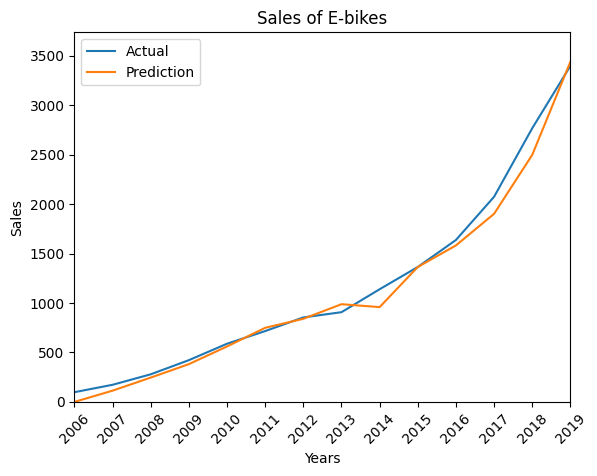

In [8]:
from matplotlib import pyplot as plt

testingPrediction = trainedModel.predict(start=testingingData.index[0], end=testingingData.index[-1])
predictionTable = pd.DataFrame({xField: testingingData[xField], yField: testingPrediction.values})

plt.plot(testingingData[xField], testingingData[yField], label="Actual")
plt.plot(predictionTable[xField], predictionTable[yField], label="Prediction")
plotting(testingingData[xField], testingingData[yField])

Used to calculate error. Higher the score, the more accurate it is

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(testingPrediction, testingingData[yField]))
mean = testingingData[yField].mean()
print(f"Mean: {mean}, RMSE: {rmse}, Score: {1 - rmse / mean}")

Mean: 1172.5, RMSE: 108.24683915891445, Score: 0.9076786019966614


Plotting future predictions with the original data

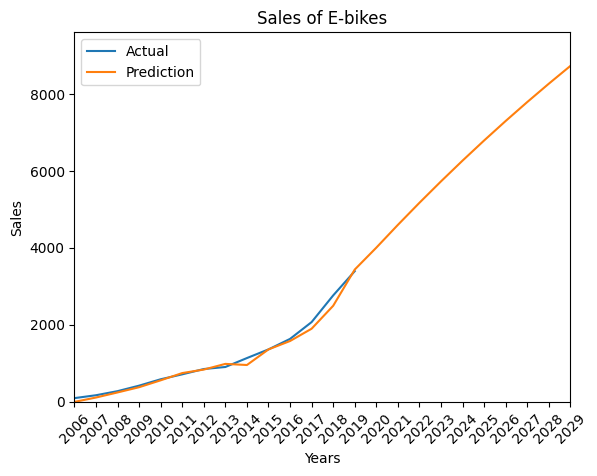

In [10]:
furtureAmount = 10
futurePredictedValue = trainedModel.predict(start=data[xField].index[0], end=data[xField].index[-1] + furtureAmount)
dateRange = pd.date_range(data[xField].iloc[0], periods=len(data[xField]) + furtureAmount, freq="YE").strftime("%Y")
predictionTable = pd.DataFrame({xField: dateRange, yField: futurePredictedValue})

plt.plot(data[xField], data[yField], label="Actual")
plt.plot(predictionTable[xField], predictionTable[yField], label="Prediction")

plotting(predictionTable[xField], predictionTable[yField])